# Finite-Difference Approximations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from helper import Approx, cleaner
from jaxtyping import Array, Float
from sympy import Derivative as D
from sympy import (
    Eq,
    Function,
    Matrix,
    O,
    Symbol,
    Wild,
    cos,
    solve,
    solve_linear_system,
    symbols,
)
from tabulate import tabulate

In [2]:
x = symbols("x")
h = symbols("h", positive=True)
f = Function("f")

## They Taylor Series
### Forward Taylor Series

In [3]:
Eq(f(x + h), f(x + h).series(x=h, x0=0, n=5).simplify())

Eq(f(h + x), f(x) + h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 + h**3*Derivative(f(x), (x, 3))/6 + h**4*Derivative(f(x), (x, 4))/24 + O(h**5))

### Backward Taylor Series

In [4]:
Eq(f(x - h), f(x - h).series(x=h, x0=0, n=5).simplify())

Eq(f(-h + x), f(x) - h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 - h**3*Derivative(f(x), (x, 3))/6 + h**4*Derivative(f(x), (x, 4))/24 + O(h**5))

### Truncating the Taylor series
### Truncation error

In [5]:
Approx(cos(x + h), cos(x + h).series(x=h, x0=0, n=2).removeO().simplify())

Eq(cos(h + x), -h*sin(x) + cos(x))

In [6]:
x = 0
h = 0.1
exact = np.cos(x + h)
first_order_approximation = np.cos(x) - h * np.sin(x)
truncation_error = np.abs(exact - first_order_approximation)
E_h = np.abs(-(np.power(h, 2)) / 2 * np.cos(x))

In [7]:
print(
    f"Truncation error: {truncation_error}\nE({h}): {E_h}\nError: {np.abs(truncation_error - E_h)}"
)

Truncation error: 0.0049958347219741794
E(0.1): 0.005000000000000001
Error: 4.165278025821534e-06


### Plot

In [8]:
h = np.flip(np.reciprocal(2 ** np.arange(1, 5).astype(float)))
x = 1

In [9]:
h

array([0.0625, 0.125 , 0.25  , 0.5   ])

In [10]:
error_truncation = np.abs(np.cos(x + h) - (np.cos(x) - h * np.sin(x)))

In [11]:
error_truncation

array([0.0010207 , 0.00394192, 0.0146122 , 0.04882961])

In [12]:
h_values = np.linspace(start=0, stop=h.max())
E_h = np.abs(-1 / 2 * h_values**2 * np.cos(x))

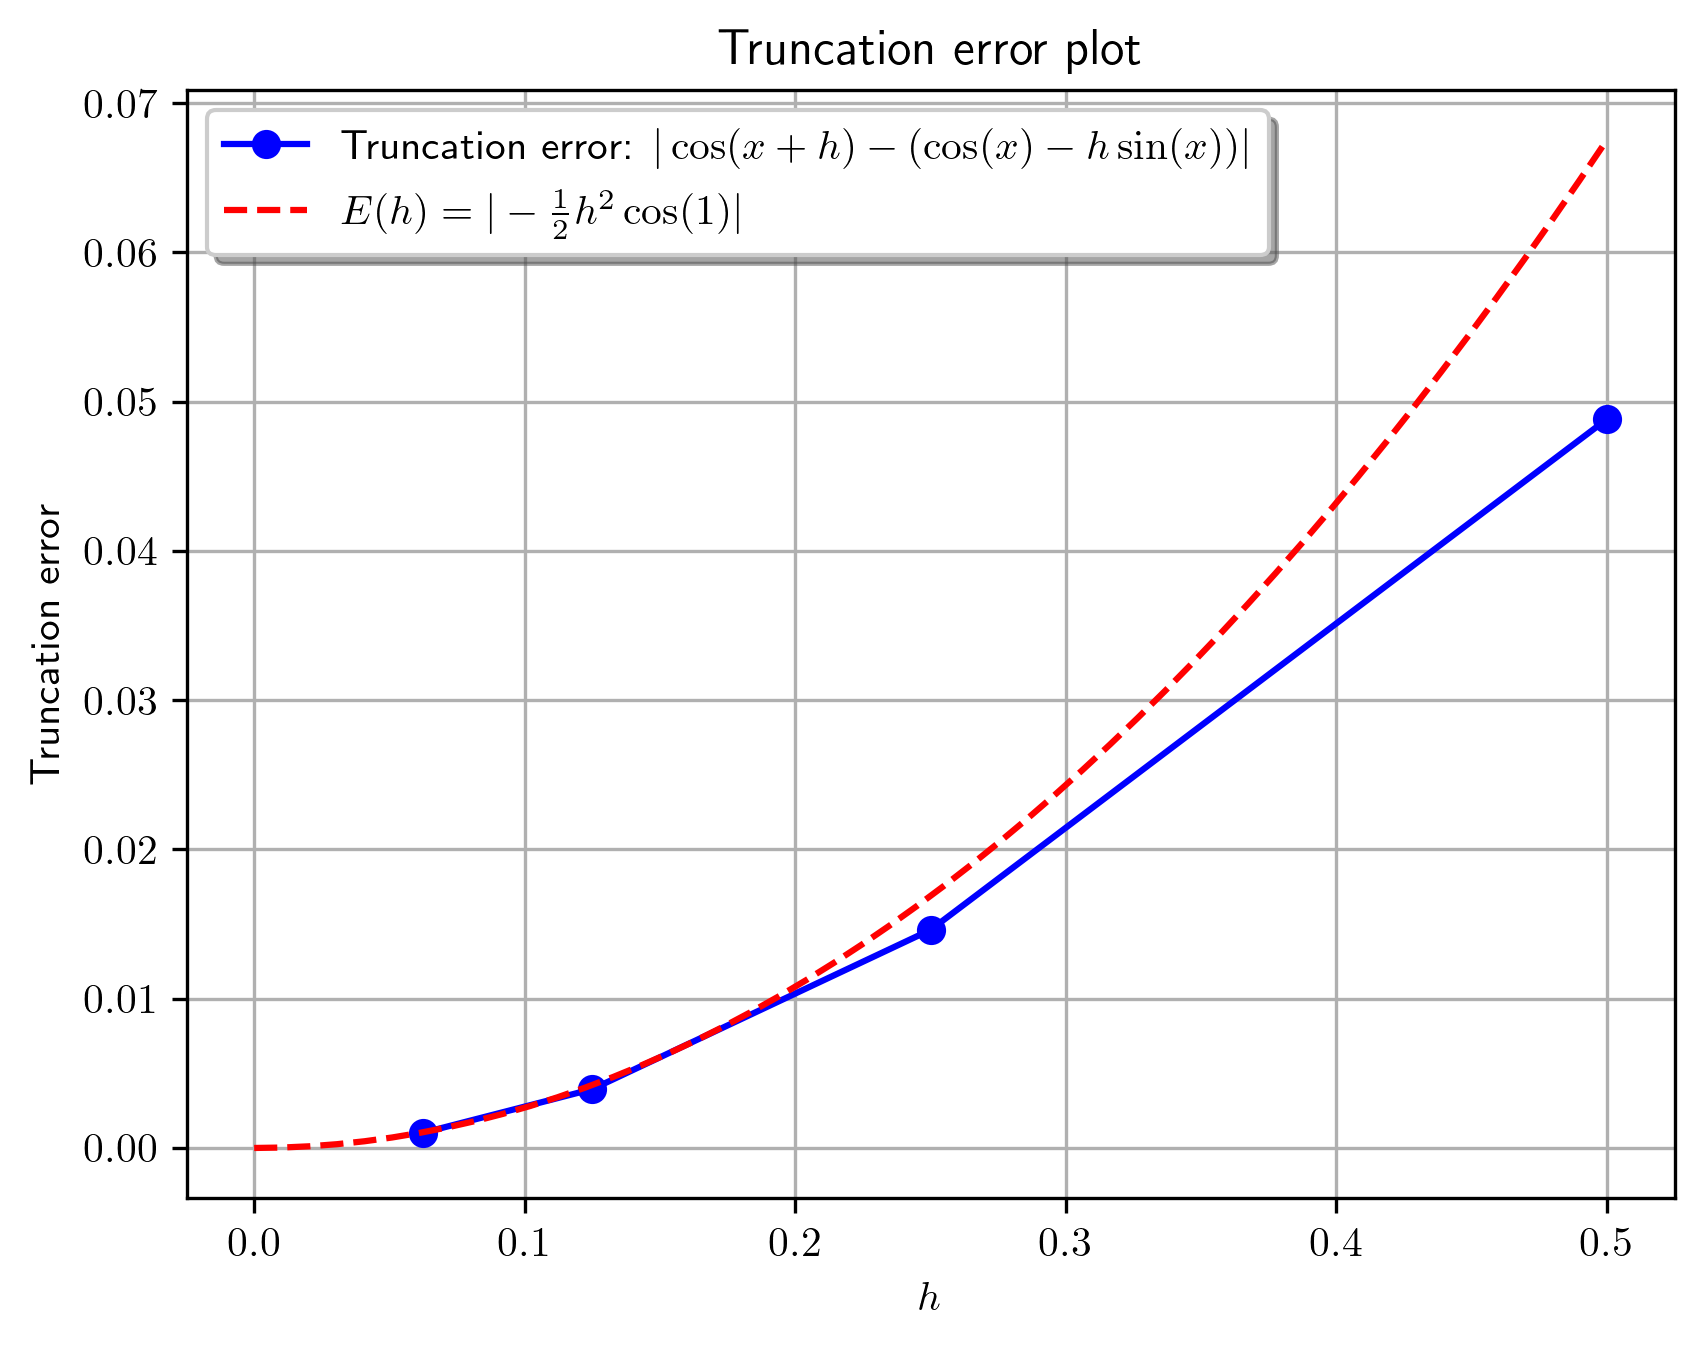

In [13]:
fig, ax = plt.subplots()
ax.plot(
    h,
    error_truncation,
    "bo-",
    label=r"Truncation error: $|\cos(x+h) - (\cos(x) - h\sin(x))|$",
)
ax.plot(h_values, E_h, "r--", label=r"$E(h)=|-\frac{1}{2}h^2\cos(1)|$")
ax.set_xlabel("$h$")
ax.set_ylabel("Truncation error")
ax.set_title("Truncation error plot")
ax.grid()
legend = ax.legend(loc="best", shadow=True)

## Big-oh notation
### Expresing the truncation error as $O\left(h^{n+1}\right)$
### Properties of $O\left(h^{n}\right)$

In [14]:
h = symbols("h")
m, n, k = (5, 2, -2)
assert m > n
k * O(h**n) == O(h**n)

True

In [15]:
O(h**m) + O(h**n) == O(h**n)

True

In [16]:
m, n = (2, 5)
assert m < n
O(h**n) / h**m == O(h ** (n - m))

True

## Deriving finite-difference approximations

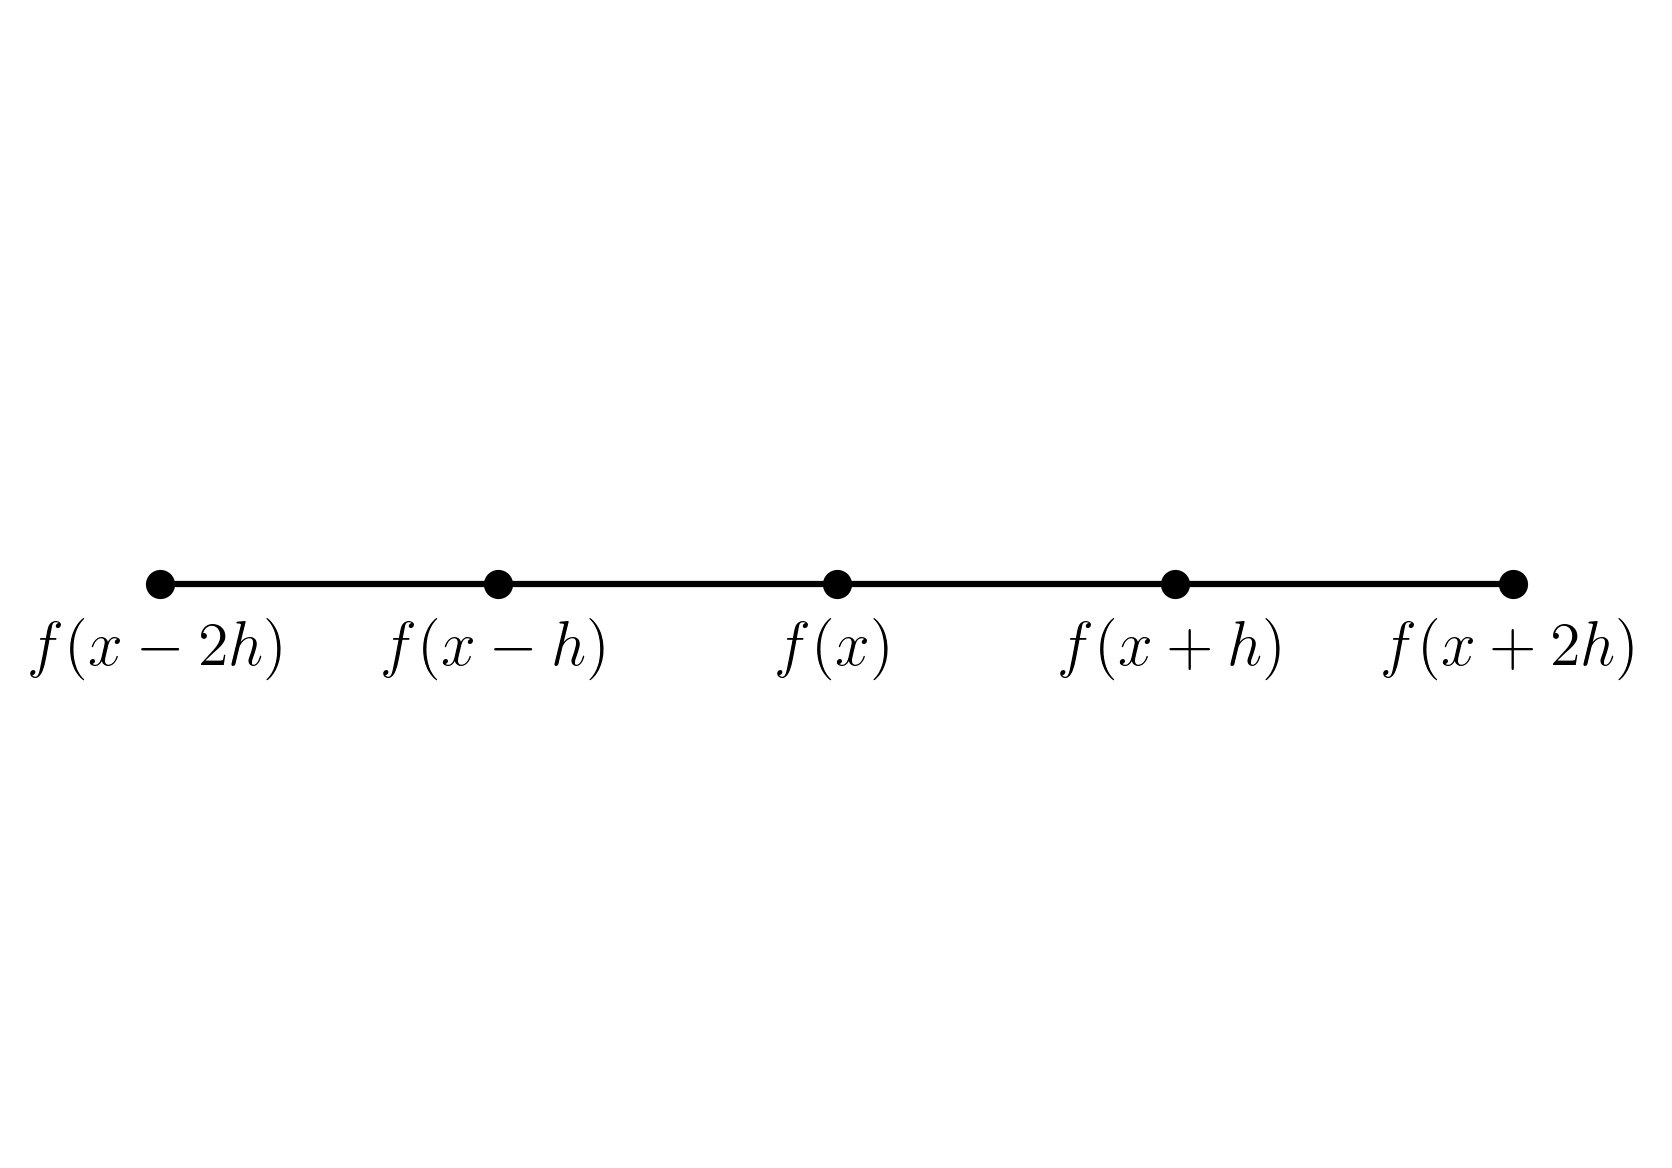

In [17]:
x = np.arange(-2, 3)

fig, ax = plt.subplots()
ax.plot(x, np.zeros_like(x), "ko-")
ax.text(x[0], -0.008, rf"$f(x-2h)$", ha="center", fontsize=15)
ax.text(x[1], -0.008, rf"$f(x-h)$", ha="center", fontsize=15)
ax.text(x[2], -0.008, rf"$f(x)$", ha="center", fontsize=15)
ax.text(x[3], -0.008, rf"$f(x+h)$", ha="center", fontsize=15)
ax.text(x[-1], -0.008, rf"$f(x+2h)$", ha="center", fontsize=15)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

### First-order accurate finite difference approximation of $f_{x}\left(x\right)$

In [18]:
x = symbols("x")
h = symbols("h", positive=True)
f = Function("f")

In [19]:
Eq(f(x + h), f(x + h).series(x=h, x0=0, n=2).simplify())

Eq(f(h + x), f(x) + h*Derivative(f(x), x) + O(h**2))

In [20]:
Eq(D(f(x)), solve(Eq(f(x + h), f(x + h).series(x=h, x0=0, n=2).simplify()), D(f(x)))[0])

Eq(Derivative(f(x), x), (f(h + x) - f(x) + O(h**2))/h)

### First-order forward difference

In [21]:
_ = f(x + h).series(x=h, x0=0, n=2).removeO().simplify()
forward_difference = Approx(D(f(x)), solve(Eq(_, f(x + h)), D(f(x)))[0])

In [22]:
forward_difference

Eq(Derivative(f(x), x), (-f(x) + f(h + x))/h)

In [23]:
Eq(f(x - h), f(x - h).series(x=h, x0=0, n=2).simplify())

Eq(f(-h + x), f(x) - h*Derivative(f(x), x) + O(h**2))

In [24]:
Eq(D(f(x)), solve(Eq(f(x - h), f(x - h).series(x=h, x0=0, n=2).simplify()), D(f(x)))[0])

Eq(Derivative(f(x), x), (-f(-h + x) + f(x) + O(h**2))/h)

### First-order backward difference

In [25]:
_ = f(x - h).series(x=h, x0=0, n=2).removeO().simplify()
backward_difference = Approx(D(f(x)), solve(Eq(_, f(x - h)), D(f(x)))[0])

In [26]:
backward_difference

Eq(Derivative(f(x), x), (f(x) - f(-h + x))/h)

### Second-order accurate finite difference approximation of $f_{x}\left(x\right)$

In [27]:
Eq(f(x + h), f(x + h).series(x=h, x0=0, n=3).simplify())

Eq(f(h + x), f(x) + h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 + O(h**3))

In [28]:
Eq(f(x - h), f(x - h).series(x=h, x0=0, n=3).simplify())

Eq(f(-h + x), f(x) - h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 + O(h**3))

In [29]:
Eq(
    f(x + h) - f(x - h),
    f(x + h).series(x=h, x0=0, n=3).simplify()
    - f(x - h).series(x=h, x0=0, n=3).simplify(),
)

Eq(-f(-h + x) + f(h + x), 2*h*Derivative(f(x), x) + O(h**3))

### Second-order central difference

In [30]:
_ = f(x + h).series(x=h, x0=0, n=3).removeO().simplify()
__ = f(x - h).series(x=h, x0=0, n=3).removeO().simplify()
central_difference = Approx(
    D(f(x), x), solve(Eq(_ - __, f(x + h) - f(x - h)), D(f(x), x))[0]
)

In [31]:
central_difference

Eq(Derivative(f(x), x), (-f(-h + x) + f(h + x))/(2*h))

### Second-order accurate finite difference approximation of $f_{xx}\left(x\right)$

In [32]:
Eq(f(x + h), f(x + h).series(x=h, x0=0, n=4).simplify())

Eq(f(h + x), f(x) + h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 + h**3*Derivative(f(x), (x, 3))/6 + O(h**4))

In [33]:
Eq(f(x - h), f(x - h).series(x=h, x0=0, n=4).simplify())

Eq(f(-h + x), f(x) - h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 - h**3*Derivative(f(x), (x, 3))/6 + O(h**4))

In [34]:
Eq(
    f(x + h) + f(x - h),
    f(x + h).series(x=h, x0=0, n=4).simplify()
    + f(x - h).series(x=h, x0=0, n=4).simplify(),
)

Eq(f(-h + x) + f(h + x), 2*f(x) + h**2*Derivative(f(x), (x, 2)) + O(h**4))

### Second-order symmetric difference

In [35]:
_ = f(x + h).series(x=h, x0=0, n=4).removeO().simplify()
__ = f(x - h).series(x=h, x0=0, n=4).removeO().simplify()
symmetric_difference = Approx(
    D(f(x), x, 2), solve(Eq(_ + __, f(x + h) + f(x - h)), D(f(x), x, 2))[0]
)

In [36]:
symmetric_difference

Eq(Derivative(f(x), (x, 2)), (-2*f(x) + f(-h + x) + f(h + x))/h**2)

In [37]:
cleaner(["x", "h", "f"])

Symbolic variables already cleared


### Example $3$

In [38]:
def forward_first_derivative(
    f: np.ufunc, x: float, h: Float[Array, "dim1"]
) -> Float[Array, "dim1"]:
    return (f(x + h) - f(x)) / h


def backward_first_derivative(
    f: np.ufunc, x: float, h: Float[Array, "dim1"]
) -> Float[Array, "dim1"]:
    return (f(x) - f(x - h)) / h


def central_first_derivative(
    f: np.ufunc, x: float, h: Float[Array, "dim1"]
) -> Float[Array, "dim1"]:
    return (f(x + h) - f(x - h)) / (2 * h)


def central_second_derivative(
    f: np.ufunc, x: float, h: Float[Array, "dim1"]
) -> Float[Array, "dim1"]:
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2

In [39]:
f = np.cos
f_prime = lambda x: -np.sin(x)
f_prime_prime = lambda x: -np.cos(x)
x = np.pi / 4
h = np.array(0.1)
exact_first_derivative = f_prime(x)
exact_second_derivative = f_prime_prime(x)

In [40]:
ffd = forward_first_derivative(f=f, x=x, h=h)
bfd = backward_first_derivative(f=f, x=x, h=h)
cfd = central_first_derivative(f=f, x=x, h=h)
csd = central_second_derivative(f=f, x=x, h=h)

In [41]:
print(
    f"First derivative: {exact_first_derivative}\nForward first derivative: {ffd}\nBackward first derivative: {bfd}\
\nCentral first derivative: {cfd}\nSecond derivative: {exact_second_derivative}\nCentral second derivative: {csd}"
)

First derivative: -0.7071067811865475
Forward first derivative: -0.741254745095894
Backward first derivative: -0.6706029729039886
Central first derivative: -0.7059288589999413
Second derivative: -0.7071067811865476
Central second derivative: -0.7065177219190532


In [42]:
error_ffd = np.abs(exact_first_derivative - ffd)
error_bfd = np.abs(exact_first_derivative - bfd)
error_cfd = np.abs(exact_first_derivative - cfd)
error_csd = np.abs(exact_second_derivative - csd)

In [43]:
print(
    f"Error forward first derivative: {error_ffd}\nError backward first derivative: {error_bfd}\
\nError central first derivative: {error_cfd}\nError central second derivative: {error_csd}"
)

Error forward first derivative: 0.03414796390934649
Error backward first derivative: 0.036503808282558836
Error central first derivative: 0.0011779221866061729
Error central second derivative: 0.0005890592674944184


### Estimating the order of an approximation

$$
n\approx
\dfrac{\log\left|E\left(h_{\max}\right)\right| -\log\left|E\left(h_{\min}\right)\right|}{
\log\left(h_{\max}\right)-\log\left(h_{\min}\right)
}.
$$

In [44]:
def estimate_order(
    h: Float[Array, "dim1"], truncation_error: Float[Array, "dim1"]
) -> float:
    assert h.size == truncation_error.size

    Eh_max = truncation_error[np.argmax(h, axis=0)[0]][0]
    Eh_min = truncation_error[np.argmin(h, axis=0)[0]][0]

    return (np.log(np.abs(Eh_max)) - np.log(np.abs(Eh_min))) / (
        np.log(h.max()) - np.log(h.min())
    )

### Table 2.1

Finite-difference approximations of the first derivative of
$f\left(x\right)=\cos\left(x\right)$ at $x=\dfrac{\pi}{4}$ using
step lengths $h\in\left\{0.1,0.05,0.25,0.0125,0.00625\right\}$.

In [104]:
f = np.cos
f_prime = lambda x: -np.sin(x)
x = np.pi / 4
h = np.reciprocal(10 * (2 ** np.arange(5).astype(float)))[np.newaxis].T

In [105]:
h

array([[0.1    ],
       [0.05   ],
       [0.025  ],
       [0.0125 ],
       [0.00625]])

In [106]:
forward = forward_first_derivative(f=f, x=x, h=h)
backward = backward_first_derivative(f=f, x=x, h=h)
central = central_first_derivative(f=f, x=x, h=h)

In [107]:
tabular = np.concatenate((h, forward, backward, central), axis=1)
header = ["h", "Forward", "Backward", "Central"]

In [108]:
print(tabulate(tabular_data=tabular, headers=header, floatfmt=(".5e")))  # TODO: As xarray.

          h       Forward      Backward       Central
-----------  ------------  ------------  ------------
1.00000e-01  -7.41255e-01  -6.70603e-01  -7.05929e-01
5.00000e-02  -7.24486e-01  -6.89138e-01  -7.06812e-01
2.50000e-02  -7.15872e-01  -6.98195e-01  -7.07033e-01
1.25000e-02  -7.11508e-01  -7.02669e-01  -7.07088e-01
6.25000e-03  -7.09312e-01  -7.04892e-01  -7.07102e-01


In [113]:
print(f"{f_prime(x).5e}")

-0.7071067811865475


In [110]:
error_forward = np.abs(f_prime(x) - forward)
error_backward = np.abs(f_prime(x) - backward)
error_central = np.abs(f_prime(x) - central)

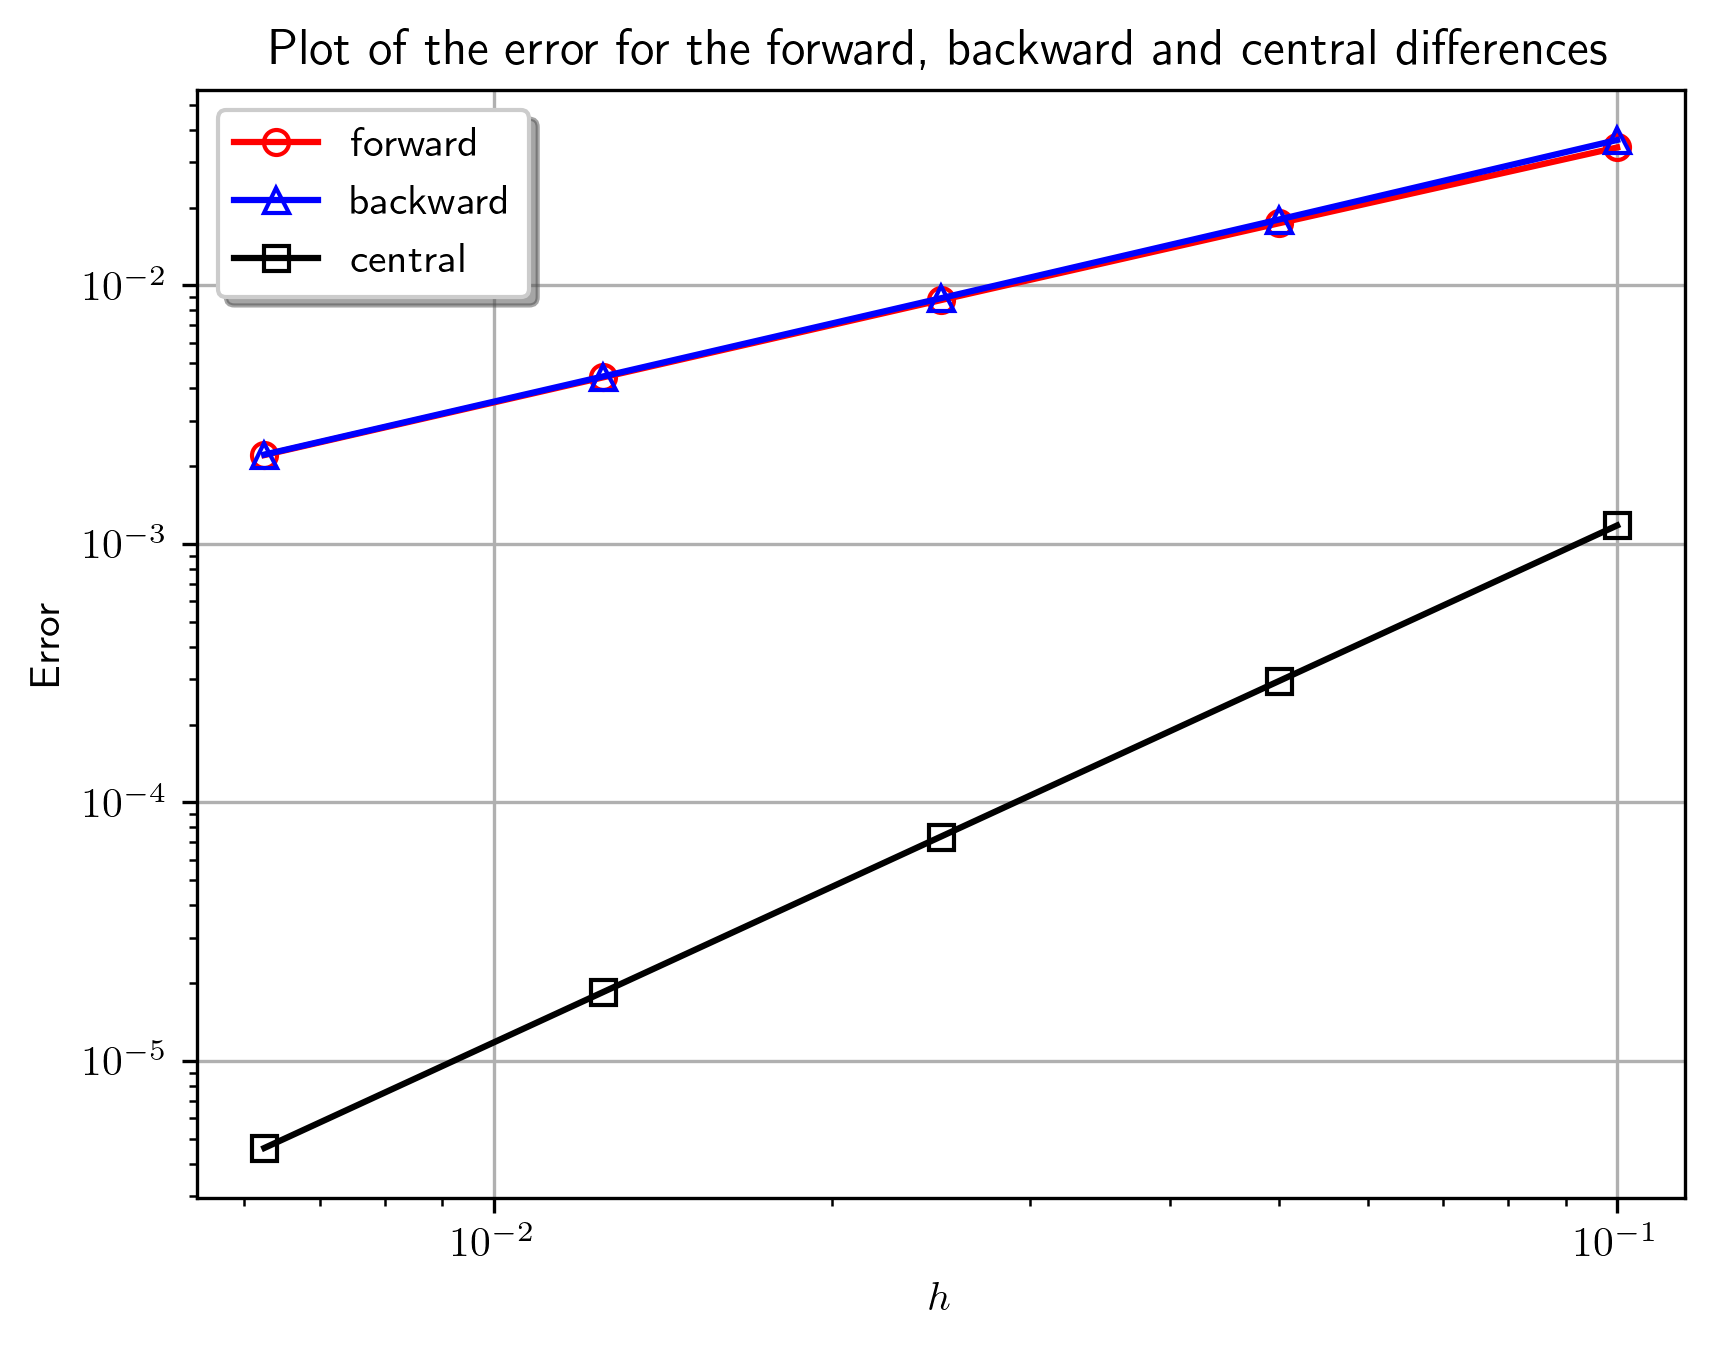

In [111]:
fig, ax = plt.subplots()
ax.loglog(h, error_forward, "ro-", mfc="none", label="forward")
ax.loglog(h, error_backward, "b^-", mfc="none", label="backward")
ax.loglog(h, error_central, "ks-", mfc="none", label="central")
ax.set_xlabel(r"$h$")
ax.set_ylabel(r"Error")
ax.set_title("Plot of the error for the forward, backward and central differences")
ax.grid()
legend = ax.legend(loc="best", shadow=True)

### Table 2.2

Truncation errors for the Taylor series approximations of
$\cos\left(1+h\right)$ for $h\in\left\{0.5,0.25,0.125,0.0625\right\}$.

In [53]:
f = lambda h: np.cos(1 + h)
f_prime = lambda h: -np.sin(1 + h)
x = 1
h = np.reciprocal(2 ** np.arange(1, 5).astype(float))[np.newaxis].T

In [54]:
h

array([[0.5   ],
       [0.25  ],
       [0.125 ],
       [0.0625]])

In [55]:
forward = forward_first_derivative(f=f, x=x, h=h)
backward = backward_first_derivative(f=f, x=x, h=h)
central = central_first_derivative(f=f, x=x, h=h)

In [56]:
error_forward = np.abs(f_prime(x) - forward)
error_backward = np.abs(f_prime(x) - backward)
error_central = np.abs(f_prime(x) - central)

In [57]:
tabular = np.concatenate((h, error_forward, error_backward, error_central), axis=1)
header = ["h", "Forward error", "Backward error", "Central error"]

In [58]:
print(tabulate(tabular_data=tabular, headers=header, floatfmt=(".5e")))

          h    Forward error    Backward error    Central error
-----------  ---------------  ----------------  ---------------
5.00000e-01      1.39304e-01       6.44706e-02      3.74166e-02
2.50000e-01      6.11903e-02       4.23057e-02      9.44229e-03
1.25000e-01      2.83414e-02       2.36092e-02      2.36611e-03
6.25000e-02      1.35922e-02       1.24085e-02      5.91875e-04


In [59]:
estimate_order(h, error_forward)

1.1191270541574243

In [60]:
estimate_order(h, error_backward)

0.7924386666069776

In [61]:
estimate_order(h, error_central)

1.9940809174948577

### Finite-difference approximations of mixed derivatives

In [62]:
x, y = symbols("x y")
dx = Symbol(r"\Delta x")
dy = Symbol(r"\Delta y")
f = Function("f")
arg1, arg2 = Wild("arg1"), Wild("arg2")

In [63]:
_ = Approx(f(x + dx, y), f(x + dx, y).series(x=dx, x0=0, n=2).removeO().simplify())

In [64]:
__ = Approx(f(x, y + dy), f(x, y + dy).series(x=dy, x0=0, n=2).removeO().simplify())

In [65]:
Eq1 = Approx(D(f(x, y), x), solve(_, D(f(x, y), x))[0])

In [66]:
Eq2 = Approx(D(f(x, y), y), solve(__, D(f(x, y), y))[0])

In [67]:
Eq1

Eq(Derivative(f(x, y), x), (-f(x, y) + f(\Delta x + x, y))/\Delta x)

In [68]:
Eq2

Eq(Derivative(f(x, y), y), (-f(x, y) + f(x, \Delta y + y))/\Delta y)

In [69]:
Approx(
    D(D(f(x, y), y), x),
    Eq1.rhs.replace(f(arg1, arg2), D(f(arg1, arg2), arg2)),
)

Eq(Derivative(f(x, y), y, x), (-Derivative(f(x, y), y) + Derivative(f(\Delta x + x, y), y))/\Delta x)

In [70]:
Approx(
    D(D(f(x, y), y), x),
    Eq1.rhs.replace(f(arg1, arg2), D(f(arg1, arg2), arg2)).subs(
        {
            D(f(x + dx, y), y): Eq2.rhs.replace(f(arg1, arg2), f(arg1 + dx, arg2)),
            D(f(x, y), y): Eq2.rhs,
        }
    ),
)

Eq(Derivative(f(x, y), y, x), (-(-f(x, y) + f(x, \Delta y + y))/\Delta y + (-f(\Delta x + x, y) + f(\Delta x + x, \Delta y + y))/\Delta y)/\Delta x)

In [71]:
Approx(
    D(D(f(x, y), y), x),
    ((Eq2.rhs.replace(f(arg1, arg2), f(arg1 + dx, arg2)) - Eq2.rhs) / dx).simplify(),
)

Eq(Derivative(f(x, y), y, x), (f(x, y) - f(x, \Delta y + y) - f(\Delta x + x, y) + f(\Delta x + x, \Delta y + y))/(\Delta x*\Delta y))

### Deriving finite-difference formulae using the method of undetermined coefficients

In [72]:
c_1, c_2, c_3, x, h = symbols("c_1 c_2 c_3 x h")
f_n = Function("f_{(n)}")

In [73]:
Eq(f_n(x), c_1 * f(x - h) + c_2 * f(x) + c_3 * f(x + h))

Eq(f_{(n)}(x), c_1*f(-h + x) + c_2*f(x) + c_3*f(h + x))

In [74]:
Eq(
    f_n(x),
    (
        c_1 * f(x - h).series(x=h, x0=0, n=3).simplify()
        + c_2 * f(x)
        + c_3 * f(x + h).series(x=h, x0=0, n=3).simplify()
    ).simplify(),
)

Eq(f_{(n)}(x), c_3*f(x) + c_3*h*Derivative(f(x), x) + c_3*h**2*Derivative(f(x), (x, 2))/2 + c_2*f(x) + c_1*f(x) - c_1*h*Derivative(f(x), x) + c_1*h**2*Derivative(f(x), (x, 2))/2 + O(h**3))

In [75]:
solve_linear_system(
    Matrix(((1, 1, 1, 0), (-1, 0, 1, 1 / h), (1, 0, 1, 0))), c_1, c_2, c_3
)

{c_1: -1/(2*h), c_2: 0, c_3: 1/(2*h)}

In [76]:
solve_linear_system(
    Matrix(((1, 1, 1, 0), (-1, 0, 1, 0), (1, 0, 1, 2 / h**2))), c_1, c_2, c_3
)

{c_1: h**(-2), c_2: -2/h**2, c_3: h**(-2)}

### Example 4

In [77]:
Eq(f_n(x), c_1 * f(x) + c_2 * f(x + h) + c_3 * f(x + 2 * h))

Eq(f_{(n)}(x), c_1*f(x) + c_2*f(h + x) + c_3*f(2*h + x))

In [78]:
f(x + 2 * h).series(x=2 * h, x0=0, n=3).simplify()

f(x) + 2*h*Derivative(f(x), x) + 2*h**2*Derivative(f(x), (x, 2)) + O(h**3)

In [79]:
Eq(
    f_n(x),
    (
        c_1 * f(x)
        + c_2 * f(x + h).series(x=h, x0=0, n=3).simplify()
        + c_3 * f(x + 2 * h).series(x=2 * h, x0=0, n=3).simplify()
    ).simplify(),
)

Eq(f_{(n)}(x), c_3*f(x) + 2*c_3*h*Derivative(f(x), x) + 2*c_3*h**2*Derivative(f(x), (x, 2)) + c_2*f(x) + c_2*h*Derivative(f(x), x) + c_2*h**2*Derivative(f(x), (x, 2))/2 + c_1*f(x) + O(h**3))

In [80]:
solve_linear_system(
    Matrix(((1, 1, 1, 0), (0, 1, 2, 1 / h), (0, 1 / 2, 2, 0))), c_1, c_2, c_3
)

{c_1: -1.5/h, c_2: 2.0/h, c_3: -0.5/h}

## The finite-difference toolkit

In [81]:
t, x = symbols("t x")
dt = Symbol(r"\Delta t")
dx = Symbol(r"\Delta x")
f = Function("f")

In [82]:
_ = f(t, x + dx).series(x=dx, x0=0, n=2).removeO().simplify()
__ = f(t, x - dx).series(x=dx, x0=0, n=2).removeO().simplify()

In [83]:
Approx(D(f(t, x), x), solve(Eq(_ - __, f(t, x + dx) - f(t, x - dx)), D(f(t, x), x))[0])

Eq(Derivative(f(t, x), x), (-f(t, -\Delta x + x) + f(t, \Delta x + x))/(2*\Delta x))

In [84]:
_ = f(t + dt, x).series(x=dt, x0=0, n=2).removeO().simplify()
__ = f(t - dt, x).series(x=dt, x0=0, n=2).removeO().simplify()

In [85]:
Approx(D(f(t, x), t), solve(Eq(_ - __, f(t + dt, x) - f(t - dt, x)), D(f(t, x), t))[0])

Eq(Derivative(f(t, x), t), (-f(-\Delta t + t, x) + f(\Delta t + t, x))/(2*\Delta t))

## Finite-Difference Toolkit

In [86]:
# Eq(D(f(x), x, 4), 0)

## Example of a finite difference scheme

Let $U\left(t,x\right)$ the concentration of some substance and $v$ is the speed that the substance travels
along $a\leq x\leq b$.

$$
\begin{cases}
U_{t}+v U_{x}=0
 & \text { for }a\leq x\leq b, t>0. \\
U
\left(0, x\right)=
f\left(x\right)
 & \text { for }a\leq x\leq b. \\
U
\left(t, a\right)=
U\left(t, b\right)=0
 & \text { for }t>0. \\
\end{cases}
$$

### Spatial discretization

In a uniform grid, the $i$-th node in the grid is located at $x_{i}=a+i\Delta x$.

$$
\Delta x=
\dfrac{b-a}{N-1}.
$$

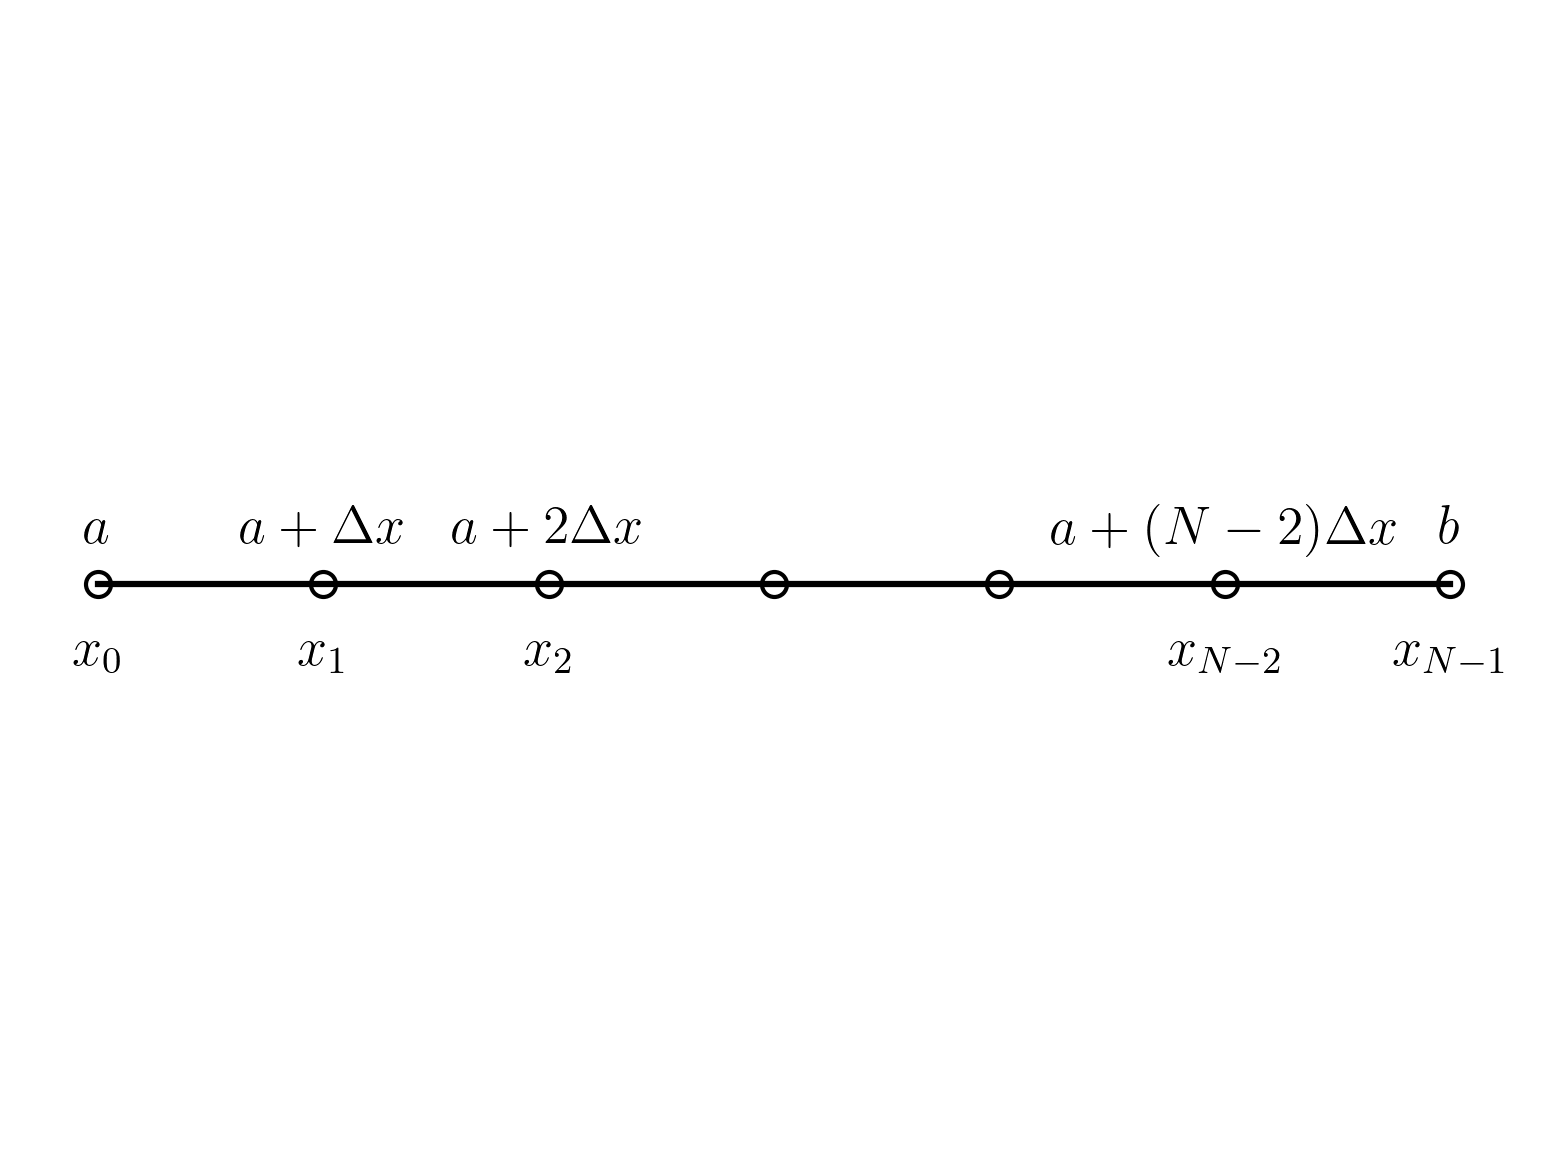

In [87]:
x = np.arange(-3, 4)

fig, ax = plt.subplots()
ax.plot(x, np.zeros_like(x), "ko-", mfc="none")
ax.text(x[0], 0.004, rf"$a$", ha="center", fontsize=13)
ax.text(x[0], -0.008, rf"$x_0$", ha="center", fontsize=13)
ax.text(x[1], 0.004, rf"$a+\Delta x$", ha="center", fontsize=13)
ax.text(x[1], -0.008, rf"$x_1$", ha="center", fontsize=13)
ax.text(x[2], 0.004, rf"$a+2\Delta x$", ha="center", fontsize=13)
ax.text(x[2], -0.008, rf"$x_2$", ha="center", fontsize=13)
ax.text(x[-2], 0.004, rf"$a+(N-2)\Delta x$", ha="center", fontsize=13)
ax.text(x[-2], -0.008, rf"$x_{{N-2}}$", ha="center", fontsize=13)
ax.text(x[-1], 0.004, rf"$b$", ha="center", fontsize=13)
ax.text(x[-1], -0.008, rf"$x_{{N-1}}$", ha="center", fontsize=13)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

## Deriving a finite-difference scheme

$$
\begin{aligned}
U_{t}+vU_{x}&=0\\
\dfrac{U^{n+1}_{i}-U^{n}_{i}}{\Delta t}+
v\dfrac{U^{n}_{i}-U^{n}_{i-1}}{\Delta x}
&=0.\\
U^{n+1}_{i}
&=
U^{n}_{i}-
\dfrac{v\Delta t}{\Delta x}
\left(U^{n}_{i}-U^{n}_{i-1}\right).
\end{aligned}
$$

In [88]:
v = symbols("v")

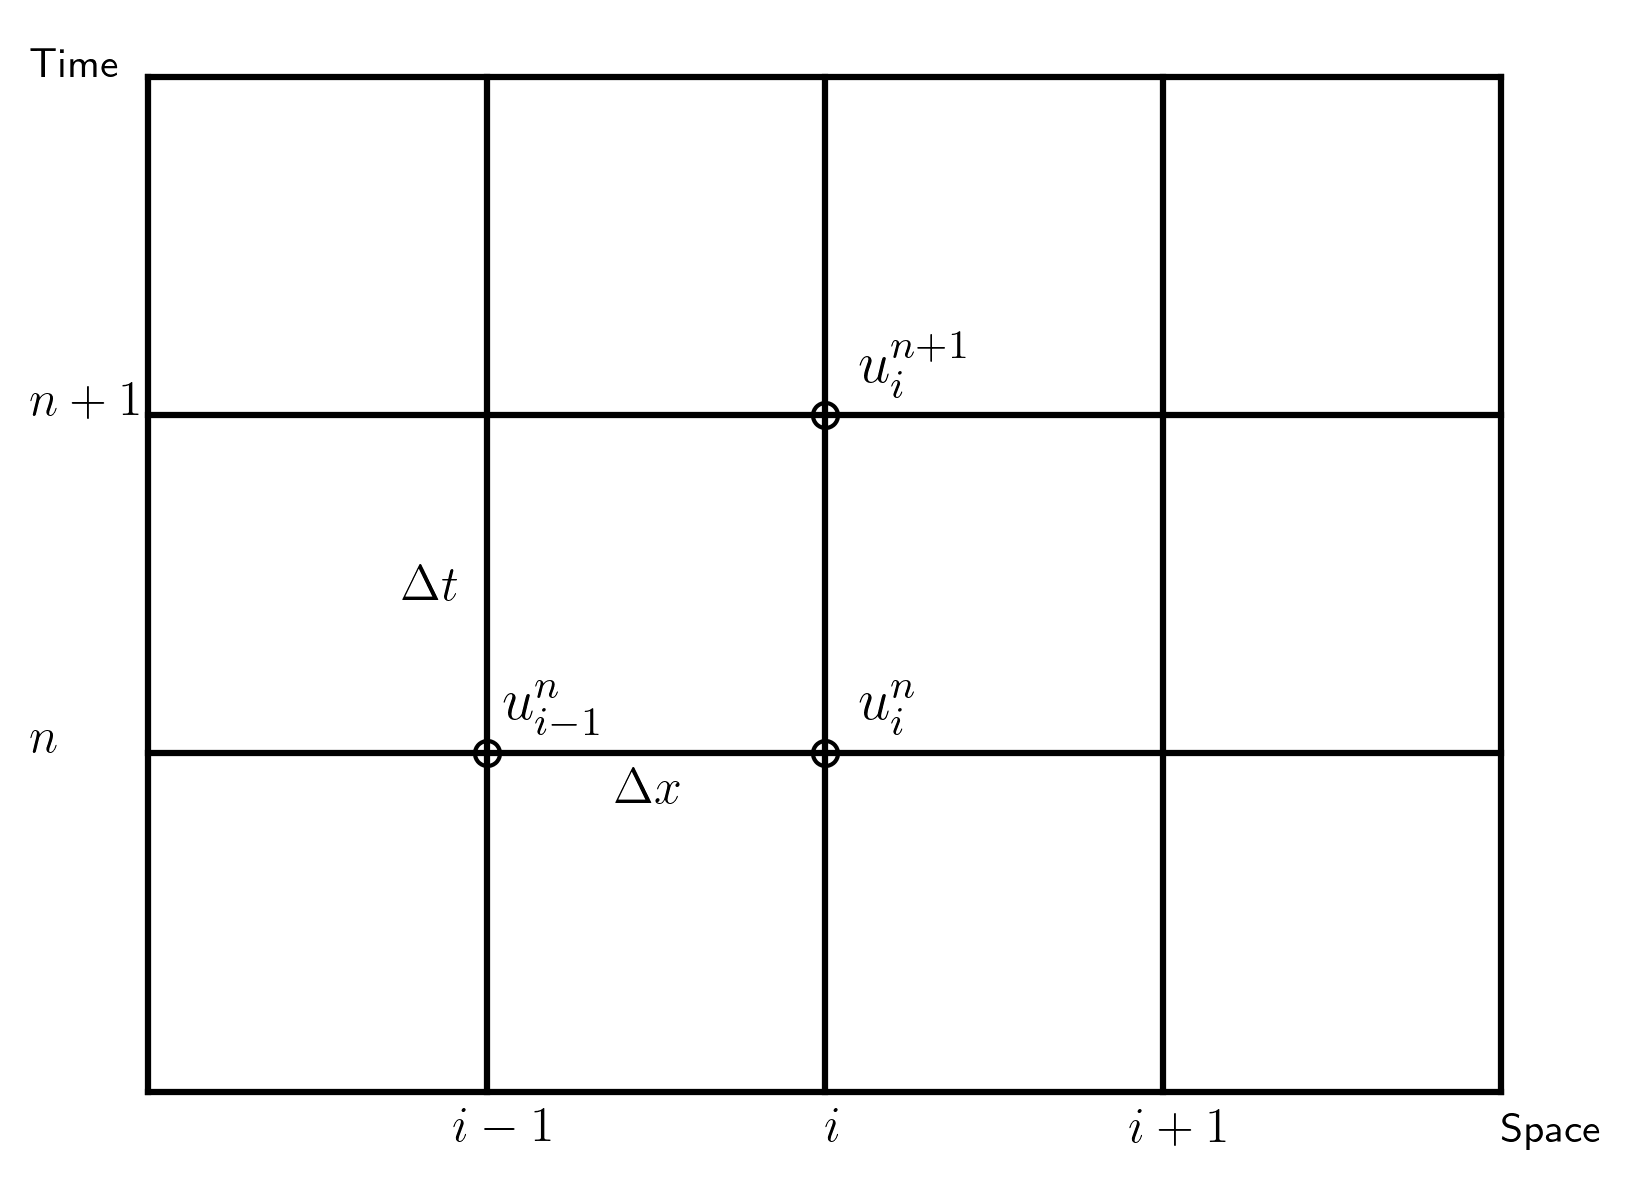

In [89]:
fig = plt.figure()
for i in range(4):
    plt.plot((0, 4), (i, i), "k")

for j in range(5):
    plt.plot((j, j), (0, 3), "k")

plt.plot(2, 2, "ko", mfc="none")
plt.plot(2, 1, "ko", mfc="none")
plt.plot(1, 1, "ko", mfc="none")

ax = fig.gca()
ax.axis("off")
ax.axis("equal")

plt.text(0.9, -0.15, "$i-1$", fontsize=12)
plt.text(2, -0.15, "$i$", fontsize=12)
plt.text(2.9, -0.15, "$i+1$", fontsize=12)
plt.text(2.1, 1.1, "$u^n_i$", fontsize=14)
plt.text(2.1, 2.1, "$u^{n+1}_i$", fontsize=14)
plt.text(1.05, 1.1, "$u^{n}_{i-1}$", fontsize=14)
plt.text(1.38, 0.85, r"$\Delta x$", fontsize=12)
plt.text(0.75, 1.45, r"$\Delta t$", fontsize=12)
plt.text(-0.35, 1, "$n$", fontsize=12)
plt.text(-0.35, 2, "$n+1$", fontsize=12)
plt.text(-0.35, 3, "Time")
plt.text(4, -0.15, "Space");

### Computational and boundary nodes

In [90]:
t, x, a, b = symbols("t x a b")
U = Function("U")

In [91]:
Eq(U(t, a), 0)

Eq(U(t, a), 0)

In [92]:
Eq(U(t, b), 0)

Eq(U(t, b), 0)

In [93]:
N = 11  # number of nodes
number_iterations = 3
x, dx = np.linspace(start=0, stop=1, num=N, retstep=True)  # node positions
v = 1  # speed
dt = 0.05  # time step
t = 0  # initial value of t

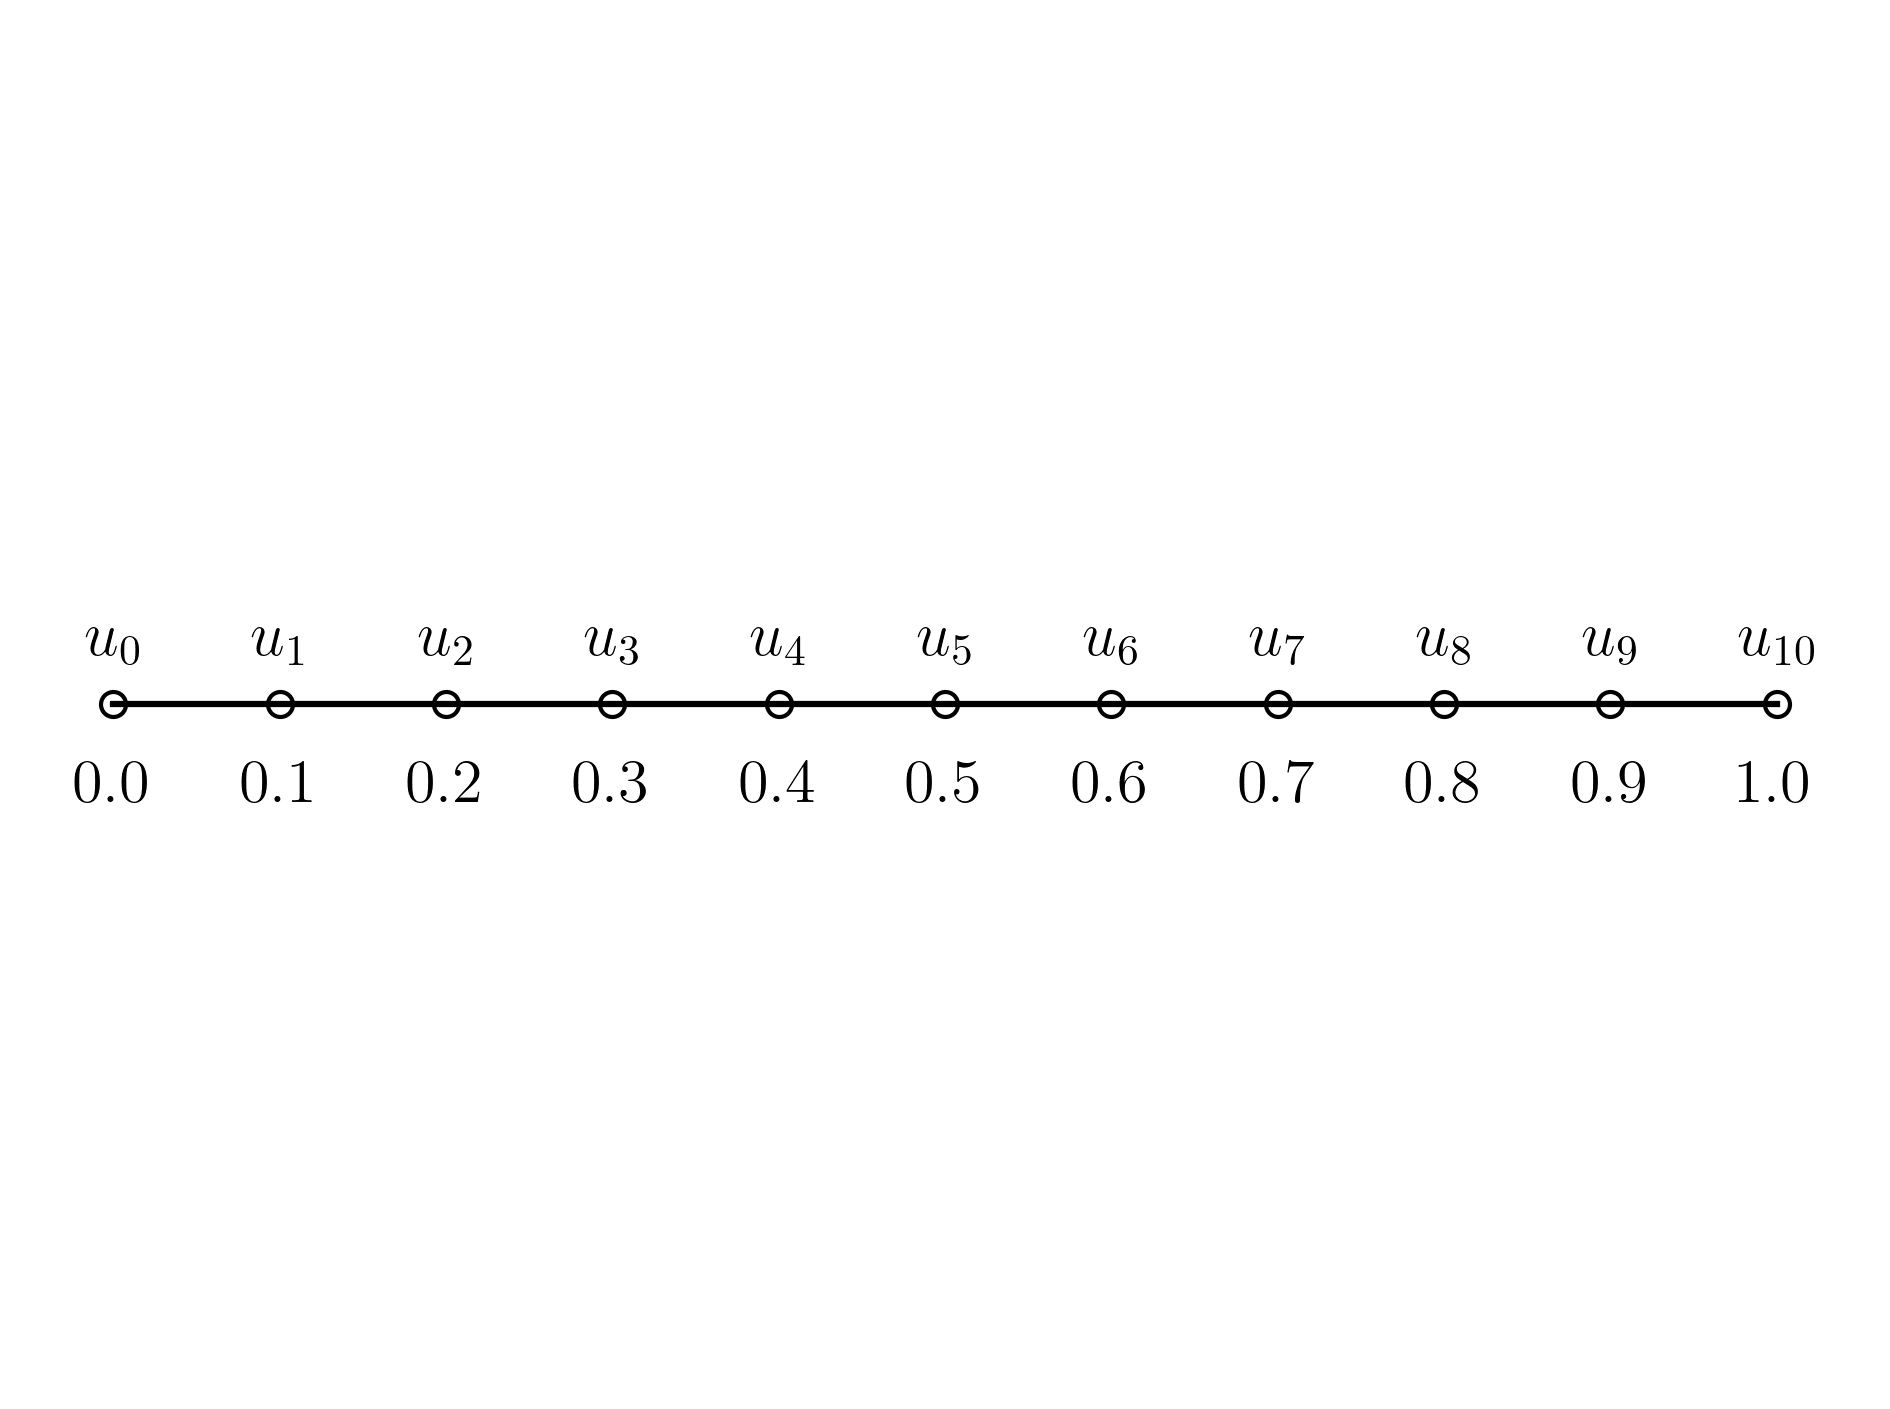

In [94]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)
ax.plot(x, np.zeros_like(x), "ko-", mfc="none")
# ax.set_xlabel(r"$x_{i}$")
for i, xi in enumerate(x):
    ax.text(xi, 0.004, rf"$u_{{{i}}}$", ha="center", fontsize=15)
    ax.text(xi, -0.008, rf"${{{np.round(xi, 2)}}}$", ha="center", fontsize=15)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

In [95]:
C = v * dt / dx

In [96]:
U = np.empty((number_iterations + 1, x.size))
U[0, :] = np.exp(-100 * np.power(x - 0.4, 2))  # initial conditions
U[0, 0], U[0, -1] = (0, 0)

In [97]:
for n in range(number_iterations):
    U[n + 1, 0], U[n + 1, -1] = (0, 0)  # boundary nodes
    for i in range(x.size):
        U[n + 1, i] = U[n, i] - C * (U[n, i] - U[n, i - 1])

In [98]:
# Values of the first three iterations of the FDS used to solve the advection equation
tabular = np.hstack(
    (
        np.array(["i", "x_i", "u^0_i", "u^1_i", "u^2_i", "u^3_i"])[np.newaxis].T,
        np.vstack((np.arange(x.size)[np.newaxis], x, U)),
    )
)
print(tabulate(tabular, floatfmt=".4f"))

-----  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  -------
i      0.0000  1.0000  2.0000  3.0000  4.0000  5.0000  6.0000  7.0000  8.0000  9.0000  10.0000
x_i    0.0000  0.1000  0.2000  0.3000  0.4000  0.5000  0.6000  0.7000  0.8000  0.9000   1.0000
u^0_i  0.0000  0.0001  0.0183  0.3679  1.0000  0.3679  0.0183  0.0001  0.0000  0.0000   0.0000
u^1_i  0.0000  0.0001  0.0092  0.1931  0.6839  0.6839  0.1931  0.0092  0.0001  0.0000   0.0000
u^2_i  0.0000  0.0000  0.0046  0.1012  0.4385  0.6839  0.4385  0.1012  0.0046  0.0000   0.0000
u^3_i  0.0000  0.0000  0.0023  0.0529  0.2698  0.5612  0.5612  0.2698  0.0529  0.0023   0.0000
-----  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  -------


In [99]:
with np.printoptions(precision=5, suppress=True):
    print(np.array([np.pi]))

[3.14159]
